# 1. Tides

## (a)

with $\vec{L} = \vec{r}\times m\vec{v}$

for a uniform spherical body

$L_{rotate} = \frac{m}{\frac{4}{3}\pi r^{3}}\int_{0}^{r}r2\pi r2\sqrt{r^2-l^2}\omega rdl$

$\qquad = \frac{2}{5}\omega_{rotate} mr_{rotate}^{2}$

for circular orbit 

$L_{orbit} = \omega_{orbit} mr_{orbit}^{2}$


so we can get for earth moon system

$L_{tot} = L_{or}^{E} + L_{or}^{M} + L_{ro}^{E} + L_{ro}^{M}$

$\ \ \ \ \ \  = \omega_{or}^{E}m_{E}(r_{or}^{E})^{2} + \omega_{or}^{M}m_{M}(r_{or}^{M})^{2}
                 + \frac{2}{5}\omega_{ro}^{E}m_{E}r_{E}^{2} + \frac{2}{5}\omega_{ro}^{M}m_{M}r_{M}^{2}$
                 
with $ P_{or}^{E} = 27.3\ d\ \ \  P_{or}^{M} = 27.3\ d\ \ \  P_{ro}^{E} = 1\ d\ \ \  P_{ro}^{M} = 27.3\ $

$\qquad m_{E} = 6.0\times10^{27}g\ \ \  r_{E} = 6.4\times10^{8}cm\ \ \  m_{M} = 7.4\times10^{25}g\ \ \  r_{M} = 1.7\times10^{8}cm$

=>$L_{or}^{E} \approx 3.74\times10^{39}\ g\ cm^{2}\ s^{-1}$

$\ \ \ L_{ro}^{E} \approx 7.14\times10^{40}\ g\ cm^{2}\ s^{-1}$

$\ \ \ L_{or}^{M} \approx 2.77\times10^{42}\ g\ cm^{2}\ s^{-1}$

$\ \ \ L_{ro}^{M} \approx 2.27\times10^{36}\ g\ cm^{2}\ s^{-1}$

showing that the orbital angular momentum of the Earth and the spin angular momentum of the Moon

are small compared to the other terms.

## (b)

with $\frac{Gm_{E}m_{M}}{r} = m_{E}\omega_{or}^{2}r_{or}^{E} = m_{M}\omega_{or}^{2}r_{or}^{M}\qquad r_{or}^{E}+r_{or}^{M} = r$

=>$r_{or}^{E} = \frac{m_{M}}{m_{E}+m_{M}}r$

$\ \ \ r_{or}^{M} = \frac{m_{E}}{m_{E}+m_{M}}r$

$\ \ \ \omega_{or} = \sqrt{\frac{G(m_{E}+m_{M})}{r^{3}}}$

with the spin anglar momentum of the Moon is much smaller than other terms

considering the whole anglar momentum of the Earth-Moon system

$L = \omega_{or}^{E}m_{E}(r_{or}^{E})^{2} + \omega_{or}^{M}m_{M}(r_{or}^{M})^{2}
                 + \frac{2}{5}\omega_{ro}^{E}m_{E}r_{E}^{2}$
                 
$\ \ \ = \frac{2}{5}m_{E}r_{E}^{2}\omega_{ro}^{E} + m_{E}m_{M}\sqrt{\frac{Gr}{m_{E}+m_{M}}}$

with the conservation of angular momentum

$\frac{dL}{dt} = \frac{2}{5}m_{E}r_{E}^{2}\dot{\omega}_{ro}^{E} + \frac{1}{2}m_{E}m_{M}\sqrt{\frac{G}{r(m_{E}+m_{M})}}\dot{r} = 0$

which gives that

$\dot{\omega}_{ro}^{E} = -\frac{5}{4}\frac{m_{M}}{r_{E}^{2}}\sqrt{\frac{G}{r(m_{E}+m_{M})}}\dot{r}$

for $\dot{r}$ is small, we can regard r as a constant during a short period

so that the Earth is slowing down its rotation at a rate proportional to the

increase in the orbital radius of the Moon

## (c)

give $\dot{r} = 3.8\ cm\ yr^{-1}$

=>$\dot{\omega}_{E} = 1.46\times10^{-14}\ s^{-1}yr^{-1}$

thus $\frac{\Delta\omega_{E}}{\omega_{E}} \sim \frac{\Delta r}{r} \sim 10^{-10}$

# 2. Neutron Star Structure

$\frac{dM}{dr} = 4\pi r^{2}\rho(1+e/c^{2})$

$\frac{dP}{dr} = -\frac{G}{r^{2}}[\rho(1+e/c^{2}) + P/c^{2}]\frac{M + 4\pi r^{3}P/c^{2}}{1 - 2GM/(rc^{2})}$

$P = K\rho^{\gamma}$

$e = \frac{P}{\rho}\frac{1}{\gamma - 1}$

$M(r=0) = 0$

$P(r=0) = K\rho_{c}^{\gamma}$

### numerical integration by a four-point Runge-Kutta sequence

In [137]:
import numpy as np
import matplotlib.pyplot as plt


def dm_dr(P,r):
    K = 1.982*10**-6   #in cgs units
    gam = 2.75
    G = 6.7*10**-8     #erg cm g^-2
    c = 3*10**10       #cm s^-1
    rho = (P/K)**(1/gam)
    e = P/(rho*(gam-1))
    dm_r = 4*np.pi*r**2*rho*(1+e/c**2)
    return dm_r
def dP_dr(P,M,r):
    K = 1.982*10**-6   #in cgs units
    gam = 2.75
    G = 6.7*10**-8     #erg cm g^-2
    c = 3*10**10       #cm s^-1
    rho = (P/K)**(1/gam)
    e = P/(rho*(gam-1))
    dP_r = -G/r**2*(rho*(1+e/c**2) + P/c**2)*(M + 4*np.pi*r**3*P/c**2)/(1 - 2*G*M/(r*c**2))
    return dP_r

def dr(P,M,r):
    d_r = delta/(dm_dr(P,r)/M - dP_dr(P,M,r)/P)
    return d_r

K = 1.982*10**-6   #in cgs units
gam = 2.75
G = 6.7*10**-8     #erg cm g^-2
c = 3*10**10       #cm s^-1
rho_c = 5*10**14   #g cm^-3
P0 = K*rho_c**gam
M0 = 0
r0 = 0
P = [P0]
M = [M0]
r = [r0]
P_n = P0
M_n = M0
r_n = r0

#delta = 0.23
#drr = dr(P_n,M_n,r_n)

drr = 10**3
k1 = 0
l1 = 0
k2 = dm_dr(P_n+drr/2*l1,r_n+drr/2)
l2 = dP_dr(P_n+drr/2*l1,M_n+drr/2*k1,r_n+drr/2)
k3 = dm_dr(P_n+drr/2*l2,r_n+drr/2)
l3 = dP_dr(P_n+drr/2*l2,M_n+drr/2*k2,r_n+drr/2)
k4 = dm_dr(P_n+drr*l3,r_n+drr)
l4 = dP_dr(P_n+drr*l3,M_n+drr*k3,r_n+drr)
P_n = P_n + drr/6*(l1+2*l2+2*l3+l4)
M_n = M_n + drr/6*(k1+2*k2+2*k3+k4)
r_n = r_n + drr
P.append(P_n)
M.append(M_n)
r.append(r_n)


Pnot0 = 1
while (Pnot0 == 1):
    drr = dr(P_n,M_n,r_n)
    k1 = dm_dr(P_n,r_n)
    l1 = dP_dr(P_n,M_n,r_n)
    k2 = dm_dr(P_n+drr/2*l1,r_n+drr/2)
    l2 = dP_dr(P_n+drr/2*l1,M_n+drr/2*k1,r_n+drr/2)
    k3 = dm_dr(P_n+drr/2*l2,r_n+drr/2)
    l3 = dP_dr(P_n+drr/2*l2,M_n+drr/2*k2,r_n+drr/2)
    k4 = dm_dr(P_n+drr*l3,r_n+drr)
    l4 = dP_dr(P_n+drr*l3,M_n+drr*k3,r_n+drr)
    P_n = P_n + drr/6*(l1+2*l2+2*l3+l4)
    M_n = M_n + drr/6*(k1+2*k2+2*k3+k4)
    r_n = r_n + drr
#    print(l4)
    P.append(P_n)
    M.append(M_n)
    r.append(r_n)
    if (P_n < 1):
        Pnot0 = 0
    
P = np.array(P)
M = np.array(M)
r = np.array(r)
#print(M,r)

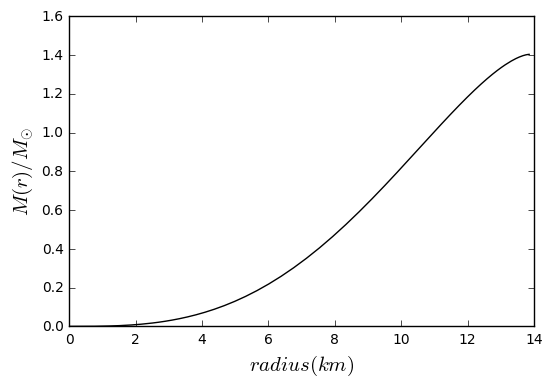

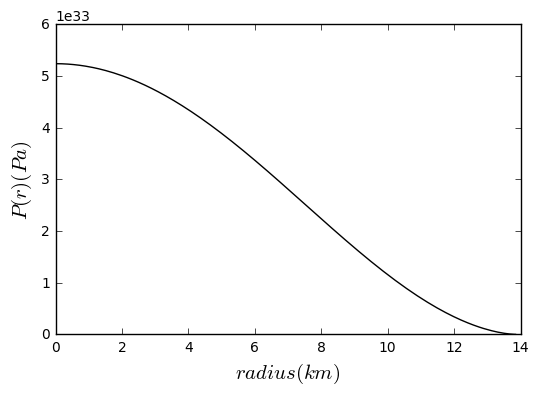

In [139]:
plt.plot(r/10**5,M/(2*10**33),'k')
plt.xlabel('$radius (km)$',fontsize=15)
plt.ylabel('$M(r)/M_{\\odot}$',fontsize=15)
plt.show()
plt.plot(r/10**5,P*0.1,'k')
plt.xlabel('$radius (km)$',fontsize=15)
plt.ylabel('$P(r) (Pa)$',fontsize=15)
plt.show()

In [142]:
import numpy as np
import matplotlib.pyplot as plt


def dm_dr(P,r):
    K = 1.982*10**-6   #in cgs units
    gam = 2.75
    G = 6.7*10**-8     #erg cm g^-2
    c = 3*10**10       #cm s^-1
    rho = (P/K)**(1/gam)
    e = P/(rho*(gam-1))
    dm_r = 4*np.pi*r**2*rho*(1+e/c**2)
    return dm_r
def dP_dr(P,M,r):
    K = 1.982*10**-6   #in cgs units
    gam = 2.75
    G = 6.7*10**-8     #erg cm g^-2
    c = 3*10**10       #cm s^-1
    rho = (P/K)**(1/gam)
    e = P/(rho*(gam-1))
    dP_r = -G/r**2*(rho*(1+e/c**2) + P/c**2)*(M + 4*np.pi*r**3*P/c**2)/(1 - 2*G*M/(r*c**2))
    return dP_r

def dr(P,M,r):
    d_r = delta/(dm_dr(P,r)/M - dP_dr(P,M,r)/P)
    return d_r

K = 1.982*10**-6   #in cgs units
gam = 2.75
G = 6.7*10**-8     #erg cm g^-2
c = 3*10**10       #cm s^-1

M = []
R = []


#rho_c = 5*10**14   #g cm^-3
rho_cc = np.arange(5*10**13,3*10**15,5*10**13)  #g cm^-3

for rho_c in rho_cc:
    P_n = K*rho_c**gam
    M_n = 0
    r_n = 0

    drr = 10**3
    k1 = 0
    l1 = 0
    k2 = dm_dr(P_n+drr/2*l1,r_n+drr/2)
    l2 = dP_dr(P_n+drr/2*l1,M_n+drr/2*k1,r_n+drr/2)
    k3 = dm_dr(P_n+drr/2*l2,r_n+drr/2)
    l3 = dP_dr(P_n+drr/2*l2,M_n+drr/2*k2,r_n+drr/2)
    k4 = dm_dr(P_n+drr*l3,r_n+drr)
    l4 = dP_dr(P_n+drr*l3,M_n+drr*k3,r_n+drr)
    P_n = P_n + drr/6*(l1+2*l2+2*l3+l4)
    M_n = M_n + drr/6*(k1+2*k2+2*k3+k4)
    r_n = r_n + drr

    Pnot0 = 1
    while (Pnot0 == 1):
        drr = dr(P_n,M_n,r_n)
        k1 = dm_dr(P_n,r_n)
        l1 = dP_dr(P_n,M_n,r_n)
        k2 = dm_dr(P_n+drr/2*l1,r_n+drr/2)
        l2 = dP_dr(P_n+drr/2*l1,M_n+drr/2*k1,r_n+drr/2)
        k3 = dm_dr(P_n+drr/2*l2,r_n+drr/2)
        l3 = dP_dr(P_n+drr/2*l2,M_n+drr/2*k2,r_n+drr/2)
        k4 = dm_dr(P_n+drr*l3,r_n+drr)
        l4 = dP_dr(P_n+drr*l3,M_n+drr*k3,r_n+drr)
        P_n = P_n + drr/6*(l1+2*l2+2*l3+l4)
        M_n = M_n + drr/6*(k1+2*k2+2*k3+k4)
        r_n = r_n + drr
#    print(l4)
        if (P_n < 1):
            M.append(M_n)
            R.append(r_n)
            Pnot0 = 0
    
M = np.array(M)
R = np.array(R)

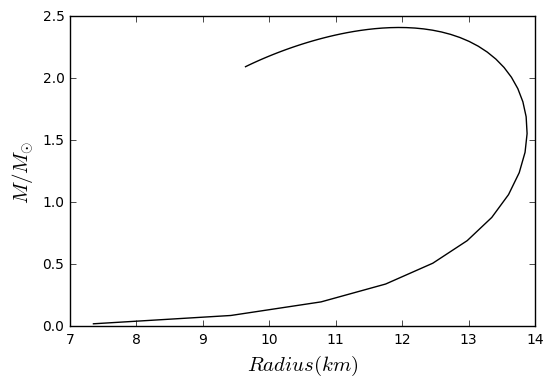

In [143]:
plt.plot(R/10**5,M/(2*10**33),'k')
plt.xlabel('$Radius (km)$',fontsize=15)
plt.ylabel('$M/M_{\\odot}$',fontsize=15)
plt.show()

# 3. Supernovae and Neutron Stars

## (a)

with $E = mc^{2} \sim 10^{51}\ erg$

$P = \frac{E}{c}$

according to the conservation of angular momentum

$P_{NS} = P_{no} \sim 3\times10^{40}\ g\ cm^{2}\ s^{-1}$

for the neutron star has a typical mass $\sim 1.4M_{\odot}$

=> the kick velocity of the neutron star $v_{k} = \frac{P_{NS}}{M_{NS}} \sim 10^{7}\ cm\ s^-1$, namely $\sim 100\ km\ s^{-1}$

## (b)

with $E_{rot} = \int_{0}^{R}\frac{1}{2}I\omega^{2}$


   $\qquad=\frac{2\pi^{2}M}{\frac{4}{3}\pi P^{2}R^{3}}\int_{0}^{R}4\pi r^{3}\sqrt{R^{2}-r^{2}}dr = \frac{4\pi^{2}}{5}\frac{MR^{2}}{P^{2}} \approx 4.3\times10^{48} erg$

$|\frac{dE}{dt}| = \frac{8\pi^{2}}{5}\frac{MR^{2}}{P^{3}}\dot{P} \approx 2.6\times10^{44}\ erg\ yr^{-1}\qquad$(here take $R = 14km$)

=> $t \sim \frac{E_{rot}}{|dE/dt|} \sim \frac{P}{2\dot{P}} \sim 1.67\times10^{4} yr$

## (c)

$E_{nos} \sim 10^{53}\ erg$

$n_{nos} \sim 10^{57}$

$E_{\nu} = \frac{E_{nos}}{n_{nos}} \sim 50\ MeV$

with $\sigma_{\nu A} = \sigma_{0}(\frac{A}{24})^{2}(\frac{E_{\nu}}{m_{e}c^{2}})^{2}\qquad\sigma_{0} = 1.7\times10^{-44}cm^{2}$

the reaction rate of neutrinos with human body

$r = F_{\nu}\sigma_{\nu A}\rho_{A}$

take human body as a container with $100kg$ water in it

$\sigma_{\nu A} = \sigma_{\nu H} + \sigma_{\nu O} \sim 10^{-40}\ cm^{2}$

$F_{\nu} = \frac{n_{nos}}{4\pi D^{2}} \sim 10^{56}D^{-2}$

$\rho_{A} \approx \frac{1}{18m_{u}}\ cm^{-3} \sim 3.35\times10^{22}\ cm^{-3}$


assume that the $E_{\nu}$ is 10% absorbed by hunman body after reaction

the total energy from a supernova event $E = rV_{body} \sim 2.68\times10^{38}D^{-2}\ erg$

With about a acute dose of 5 Sv of radiation is fatal to a human, which equals

an energy apsorption of $5\times10^{9}\ erg$ for $100kg$ human($\rho\sim 1\ g\ cm^{-3}$).

corresponding to the distance $D \sim 2.3\times10^{14}\ cm \sim 15\ AU$

and if assume that the $E_{\nu}$ is completely absorbed we can get a $D \sim 50\ AU$

# 4. Half-life of Ni

$\ ^{56}Ni \to ^{56}Co \to ^{56}Fe$

## (a)

with the decay constant $\lambda$

$\frac{dN_{Ni}}{dt} = -\lambda_{Ni}N_{Ni}\qquad\qquad\qquad$(1)

$\frac{dN_{Co}}{dt} = \lambda_{Ni}N_{Ni} - \lambda_{Co}N_{Co}\qquad\ \ \ \ $(2)

$\frac{dN_{Fe}}{dt} = \lambda_{Co}N_{Co}\qquad\qquad\qquad\ $(3)

here $\lambda_{Ni} = ln(2)/\tau_{1/2Ni}\qquad\lambda_{Co} = ln(2)/\tau_{1/2Co}$

## (b)

for equation(1), take $N_{Ni}(t=0) = n_{0}$

we can readily get that

$N_{Ni} =  n_{0}e^{-\lambda_{Ni}t}$

times $e^{\lambda_{Co}t}$ in both sides of equation (2)

we can get 

$d(e^{\lambda_{Co}t}N_{Co}) = \lambda_{Ni}n_{0}e^{\lambda_{Co}t-\lambda_{Ni}t}dt$

with $N_{Co0} = 0$

we can get that

$N_{Co} = n_{0}\frac{\lambda_{Ni}}{\lambda_{Ni}-\lambda_{Co}}(e^{-\lambda_{Co}t} - e^{-\lambda_{Ni}t})$

and finaly we can easily get that

$N_{Fe} = n_{0}(1 + \frac{\lambda_{Co}}{\lambda_{Ni}-\lambda_{Co}}e^{-\lambda_{Ni}t} - \frac{\lambda_{Ni}}{\lambda_{Ni}-\lambda_{Co}}e^{-\lambda_{Co}t})$

## (c)

considering that the energy released is from the radioactive decay of $ ^{56}Ni$ and $ ^{56}Co$

$L(t) = Q_{Ni}\lambda_{Ni}N_{Ni} + Q_{Co}\lambda_{Co}N_{Co}\qquad$(I don't give the form same with the given one)

with the equations in (a)

thus $L(t) = -Q_{Ni}\frac{dNi}{dt} + Q_{Co}(-\frac{dCo}{dt} - \frac{dNi}{dt}) = -(Q_{Ni} + Q_{Co})\frac{dNi}{dt} - Q_{Co}\frac{dCo}{dt}$

$\ \ \ \qquad = (Q_{Ni} + Q_{Co})\lambda_{Ni}n_{0}e^{-\lambda_{Ni}t} + Q_{C0}n_{0}\frac{\lambda_{Ni}}{\lambda_{Ni}-\lambda_{Co}}(\lambda_{Co}e^{-\lambda_{Co}t} - \lambda_{Ni}e^{-\lambda_{Ni}t})$

## (d)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,60*24*3600,300)
n0 = 2*10**33/(55.942132*1.6605388*10**-24)
Q_Ni = 2.136*1.6*10**-6     # erg
Q_Co = 4.564*1.6*10**-6     # erg
tau_Ni12 = 6.1*24*3600      # s
tau_Co12 = 77.1*24*3600     # s
lmd_Ni = np.log(2)/tau_Ni12 # s^-1
lmd_Co = np.log(2)/tau_Co12 # s^-1
L_t = ((Q_Ni + Q_Co)*lmd_Ni*n0*np.exp(-lmd_Ni*t) + Q_Co*n0*lmd_Ni/(lmd_Ni-lmd_Co)*(lmd_Co*np.exp(-lmd_Co*t)
         -lmd_Ni*np.exp(-lmd_Ni*t)))

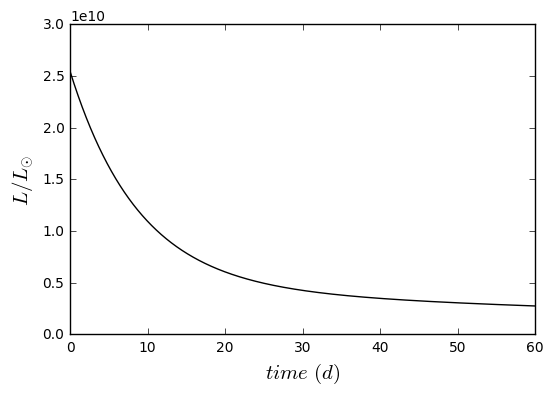

In [2]:
plt.plot(t/(24*3600),L_t/(3.8*10**33),'k')
plt.xlabel('$time\ (d)$',fontsize=15)
plt.ylabel('$L/L_{\\odot}$',fontsize=15)
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,60*24*3600,300)
n0 = 2*10**33/(55.942132*1.6605388*10**-24)
Q_Ni = 2.136*1.6*10**-6     # erg
Q_Co = 4.564*1.6*10**-6     # erg
tau_Ni12 = 6.1*24*3600      # s
tau_Co12 = 77.1*24*3600     # s
lmd_Ni = np.log(2)/tau_Ni12 # s^-1
lmd_Co = np.log(2)/tau_Co12 # s^-1
L_t = ((Q_Ni + Q_Co)*lmd_Ni*n0*np.exp(-lmd_Ni*t) + Q_Co*n0*lmd_Ni/(lmd_Ni-lmd_Co)*(lmd_Co*np.exp(-lmd_Co*t)
         -lmd_Ni*np.exp(-lmd_Ni*t)))

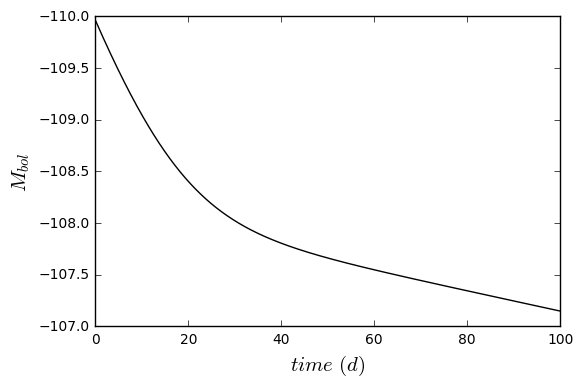

In [17]:
M = -2.5*np.log10(L_t)
plt.plot(t[0:]/(24*3600),M[0:],'k')
plt.gca().invert_yaxis()
plt.xlabel('$time\ (d)$',fontsize=15)
plt.ylabel('$M_{bol}$',fontsize=15)
plt.show()